<a href="https://colab.research.google.com/github/Cal-Poly-Data-301/lab-3-phase-2-wes-curl/blob/main/Copy_of_DATA_301_Lab_3_Wesley_Curl%2C_Grace_Carlson%2C_Aidan_Barbieux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Retrieval Practice and Learning

What is the most effective way to learn a subject? Many students focus exclusively on the _encoding_ process---that is, how to get the knowledge into memory in the first place. For example, taking notes is an activity for encoding knowledge.

_Retrieval_, on the other hand, is the process of reconstructing that knowledge from memory. [Karpicke and Blunt](http://science.sciencemag.org/content/331/6018/772) (2011) demonstrated that _retrieval_ is more effective for learning than activites designed to promote effective encoding. They conducted an experiment in which subjects had to learn about sea otters by reading a passage. Subjects were randomly assigned to one of two conditions: some were instructed to create a [concept map](https://en.wikipedia.org/wiki/Concept_map) as they read the passage, while others were instructed to practice retrieval (i.e., read the passage, recall as much as they could, read the text again, and recall again). The two main measurements they recorded were:

1. each subject's score on a follow-up learning test one week later
2. each subject's _prediction_ of how well they would do on that test

In this lab, you will analyze data from a _replication_ of Karpicke and Blunt's experiment, conducted by Buttrick _et al_.
- The data file is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv.
- The codebook (explaining what the variables mean) is here: https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/codebook.csv.

In [5]:
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/KarpickeBlunt2011Replication/data.csv"
learning_df = pd.read_csv(data_dir)
learning_df.head()

,ID,Age,Gender,Date.P1,Date.P2,Condition,IC.1,IC.2,Comp.1,Comp.2,PR.1,PR.2,MCS.1,Scorer.1,MCS.2,Scorer.2,MCS.avg,R1CS.1,Scorer.1.1,R1CS.2,Scorer.2.1,R1CS.avg,R2CS.1,Scorer.1.2,R2CS.2,Scorer.2.2,R2CS.avg,TS.1,Scorer.1.3,TS.2,Scorer.2.3,TS.avg,Exc.1,Exc.2,Collection
0,KB1,18,Female,11/21/16,11/28/16,Concept,1,1,1,1,1.0,0.80,0.750,NK,0.670,TT,0.7100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NK,0.42,MS,0.39,0,0,1
1,KB2,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.400,NK,0.367,TT,0.3835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.48,MS,0.36,NK,0.42,0,0,1
2,KB3,18,Male,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.433,NK,0.550,MS,0.4915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,NK,0.08,MS,0.08,0,0,1
3,KB4,19,Female,11/21/16,11/28/16,Concept,1,1,1,1,0.0,0.70,0.317,NK,0.333,MS,0.3250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.44,MS,0.42,NK,0.43,0,0,1
4,KB5,19,Female,11/22/16,11/29/16,Concept,1,1,1,1,0.0,0.95,0.683,NK,0.717,MS,0.7000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.26,NK,0.28,MS,0.27,0,0,1


# Question 1

Which group felt like they learned more: the subjects who made concept maps or the ones who practiced retrieval? (Or are they about the same?) Make an appropriate visualization and explain what you see.

_Hint:_ Use the variable `PR.2`, which contains the participants' predictions of how well they would do on a test one week later.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


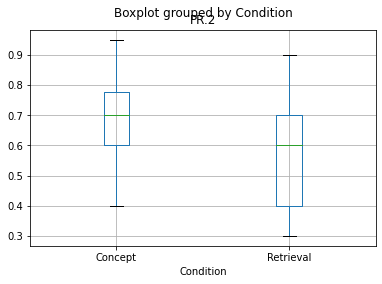

In [6]:
learning_df.boxplot("PR.2", "Condition")

It appears that, by median, the concept group felt like they would do better on future exams than the retrieval group felt like they would do by about 10%. In addition, the concept group also had a smaller distribution around their 70% median. In general, they were more confident than the retrieval group.

# Question 2

Which group actually did better on the follow-up learning test one week later? Make an appropriate visualization and explain what you see.

_Hint:_ Don't ask which variable you should use. That is for you to figure out. Read the codebook carefully (consulting the [original paper](http://science.sciencemag.org/content/331/6018/772), if necessary), make an informed decision, and explain your choice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


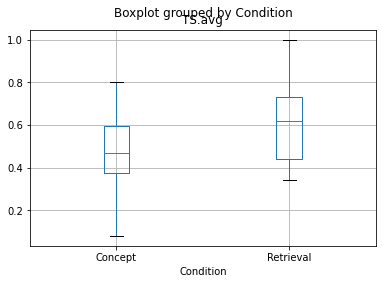

In [7]:
learning_df.boxplot("TS.avg", "Condition")

I chose to use the average of the first and second scorer's score for the final assignment. This felt like a more representative final grade for each group than using the individual grader's reports (or using an earlier exam, where there was no data to compare between groups!).

My results suggest that the retrieval group blew the concept group out of the water. The median score among the retrieval group was nearly 20% higher, with the only 100% scores coming from the retrieval group.

# Question 3

How good were subjects at predicting how well they would do on the follow-up learning test? Calculate a measure of how well subjects predicted their performance and interpret the value in context. (Optionally, you may want to include a visualization as well.)

In [57]:
import numpy as np
import altair as alt

learning_df["prediction accuracy"] = learning_df["TS.avg"] - learning_df["PR.2"]
#learning_df["prediction accuracy"].describe()
#learning_df.loc[learning_df["Condition"] == "Concept", "prediction accuracy"].describe()
#learning_df.loc[learning_df["Condition"] == "Retrieval", "prediction accuracy"].describe()

#renamed to ensure functionality
learning_df["A"] = learning_df["PR.2"]
learning_df["B"] = learning_df["TS.avg"]
# make the chart
chart = alt.Chart(learning_df).mark_point().encode(
    x="A:Q",
    y="B:Q",
    color="Condition"
)
# make the lines of best fit
chart + chart.transform_regression("A", "B", groupby=["Condition"]).mark_line()

alt.LayerChart(...)

Comparing the raw difference in predictions among each group found that The retrieval group scored 4 percentage points higher than they predicted (on average). The condition group scored a whopping 22 percentage points lower than they predicted (on average).

The average *absolute* distance from being correct was 19 percentage points for the retrieval group and 27 percentage points for the concept group. For all participants, the distance was 11 percentage points.

I also wondered if there was a relationship between predictions and reality. The concept group did *worse* the better they thought the would do, but only slightly. The retrieval group did better the better they thought they would, much more significantly.

## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 3 - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partner for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.